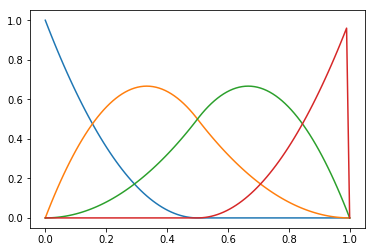

In [9]:
import numpy as np
import matplotlib.pyplot as plt

p = 2 #order of the polynomial 

n = 4 #number of basis function

knot_vect = np.array([0,0,0,0.5,1,1,1])

ctrlpts = np.array([[0,0],[0.3,1],[0.7,0.5],[1,0]])

#Calculating the basis vector

def coxDeBoor(zeta, i, d):
    
    if d==0:
        if knot_vect[i] <= zeta and zeta < knot_vect[i+1]:
            return 1
        return 0
    
    D1 = knot_vect[i+d] - knot_vect[i]
    D2 = knot_vect[i+d+1] - knot_vect[i+1]
    
    E1 = 0
    E2 = 0
    
    if D1 > 0:
        E1 = (zeta - knot_vect[i])/D1 * coxDeBoor(zeta, i, d-1)
    
    if D2 > 0:
        E2 = (knot_vect[i+d+1] - zeta)/D2 * coxDeBoor(zeta, i+1, d-1)
        
    return E1+E2

zeta = np.linspace(0,1,100)
N = np.zeros((100,n))

for z in range(len(zeta)):
    for i in range(n):
        N[z,i] = coxDeBoor(zeta[z], i, p)

plt.plot(zeta,N[:,0])
plt.plot(zeta,N[:,1])
plt.plot(zeta,N[:,2])
plt.plot(zeta,N[:,3])

plt.show()
